Importing required Libraries

In [19]:
import pandas as pd

Read CSV File

In [20]:
results = pd.read_csv(r"C:\Users\INFOBYTE\Downloads\4f58d-elections-data\results.csv")
advertisers = pd.read_csv(r"C:\Users\INFOBYTE\Downloads\4f58d-elections-data\advertisers.csv")
locations = pd.read_csv(r"C:\Users\INFOBYTE\Downloads\4f58d-elections-data\locations.csv")

In [21]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [22]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [23]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


The results data has a column named state, and the location data has a column named location name. We will merge these datasets using these columns:

In [24]:
results['State'] = results['State'].str.strip().str.lower()

locations['Location name'] = locations['Location name'].str.strip().str.lower()

merged_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


Let’s have a look at the total ad spend by state:

In [25]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()

fig = px.bar(state_ad_spend, x='State', y='Amount spent (INR)',
             labels={'State': 'State', 'Amount spent (INR)': 'Ad Spend (INR)'},
             title='Total Ad Spend by State')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=800,
                  height=600)

fig.show()

Now, let’s have a look at the average voter turnout by state:

In [26]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().reset_index()

fig = px.bar(state_voter_turnout, x='State', y='Polled (%)',
             labels={'State': 'State', 'Polled (%)': 'Voter Turnout (%)'},
             title='Average Voter Turnout by State')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=800,
                  height=600)

fig.show()

Now, let’s have a look at the top 5 parties by ad spend:

In [27]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')

advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)

party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

top_5_parties = party_ad_spend.head(5).reset_index()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

fig = px.pie(top_5_parties, values='Amount spent (INR)', names='Page name',
             title='Top 5 Parties by Ad Spend', color_discrete_sequence=colors,
             labels={'Page name': 'Political Party', 'Amount spent (INR)': 'Ad Spend (INR)'})

fig.update_traces(textinfo='percent')

fig.update_layout(
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=-0.3
    ),
    title=dict(
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    margin=dict(l=200, r=50, t=100, b=50) 
)

fig.show()

Now, let’s have a look at the correlation between ad spend and voter turnout:

In [28]:
# calculate the correlation between ad spend and voter turnout
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


Now, let’s have a look at the relationship between ad spend and voter turnout by parliamentary constituency:

In [29]:
merged_constituency_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

fig = px.scatter(merged_constituency_data, x='Amount spent (INR)', y='Polled (%)',
                 color='State',
                 labels={'Amount spent (INR)': 'Ad Spend (INR)', 'Polled (%)': 'Voter Turnout (%)'},
                 title='Ad Spend and Voter Turnout by Parliamentary Constituency')

fig.update_layout(width=800, height=600)

fig.show()

Now, let’s have a look at the distribution of ad spending:

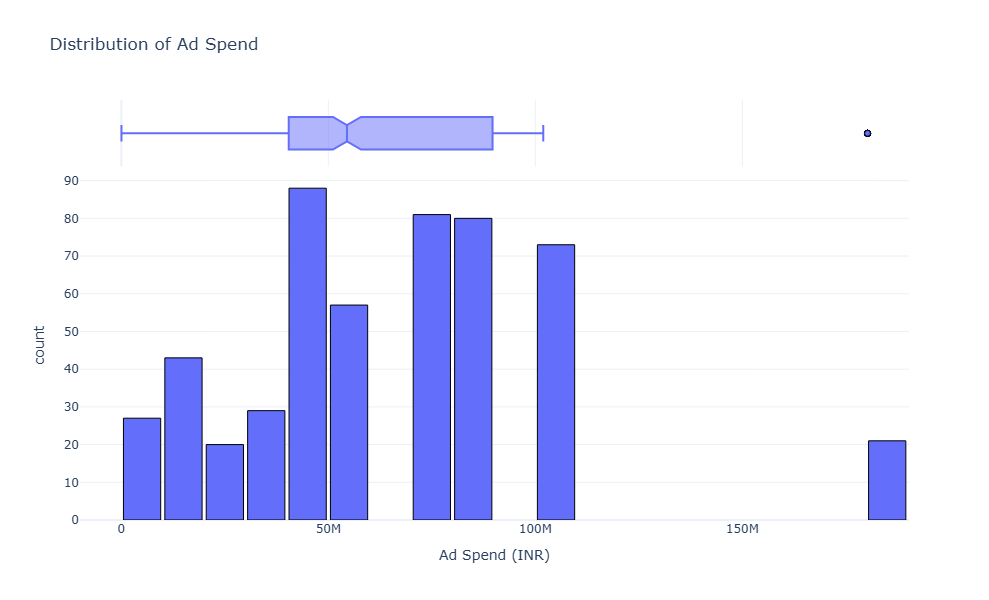

In [30]:
fig = px.histogram(merged_data, x='Amount spent (INR)', nbins=30, marginal='box',
                   labels={'Amount spent (INR)': 'Ad Spend (INR)'},
                   title='Distribution of Ad Spend')

fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.update_layout(bargap=0.1, width=800, height=600)

fig.show()

Now, let’s analyze ad spending and voter turnout by election phase:

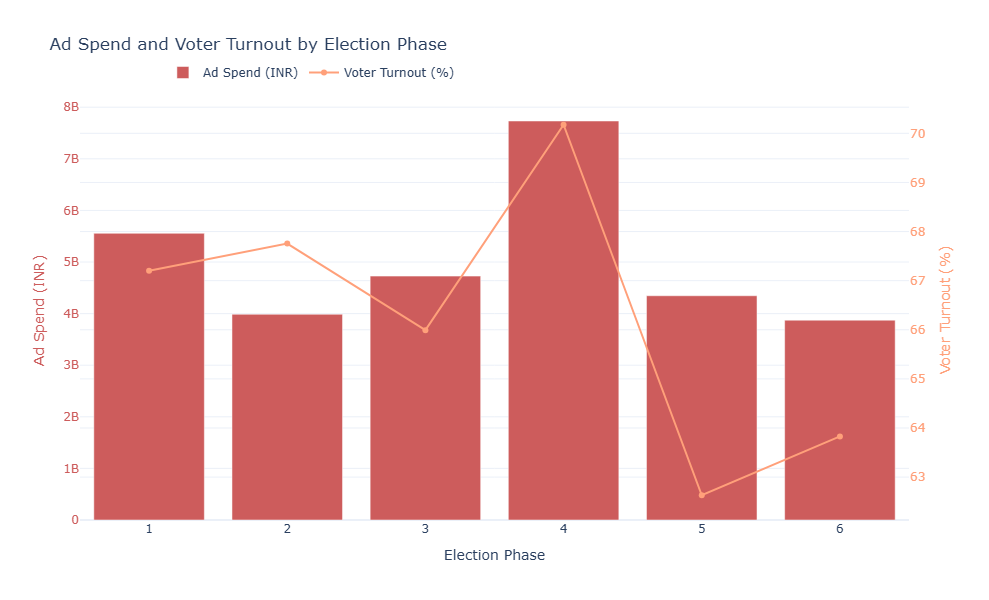

In [32]:
import plotly.graph_objects as go

phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=phase_analysis['Phase'],
    y=phase_analysis['Amount spent (INR)'],
    name='Ad Spend (INR)',
    marker_color='indianred',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=phase_analysis['Phase'],
    y=phase_analysis['Polled (%)'],
    name='Voter Turnout (%)',
    marker_color='lightsalmon',
    yaxis='y2'
))

fig.update_layout(
    title='Ad Spend and Voter Turnout by Election Phase',
    xaxis=dict(title='Election Phase'),
    yaxis=dict(
        title='Ad Spend (INR)',
        titlefont=dict(color='indianred'),
        tickfont=dict(color='indianred')
    ),
    yaxis2=dict(
        title='Voter Turnout (%)',
        titlefont=dict(color='lightsalmon'),
        tickfont=dict(color='lightsalmon'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    width=800,
    height=600
)

fig.show()